In [99]:
#Data processing
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [100]:
#Load the "loan_old.csv" dataset.
data = pandas.read_csv('loan_old.csv')

#check whether there are missing values
missing_values = data.isnull().sum()
print('Missing values:\n',missing_values)

print('----------------------')

Missing values:
 Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64
----------------------


In [101]:
#check the type of each feature (categorical or numerical)
data_types = data.dtypes
print('Data types:\n',data_types)
print('----------------------')

Data types:
 Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Income                  int64
Coapplicant_Income    float64
Loan_Tenor            float64
Credit_History        float64
Property_Area          object
Max_Loan_Amount       float64
Loan_Status            object
dtype: object
----------------------


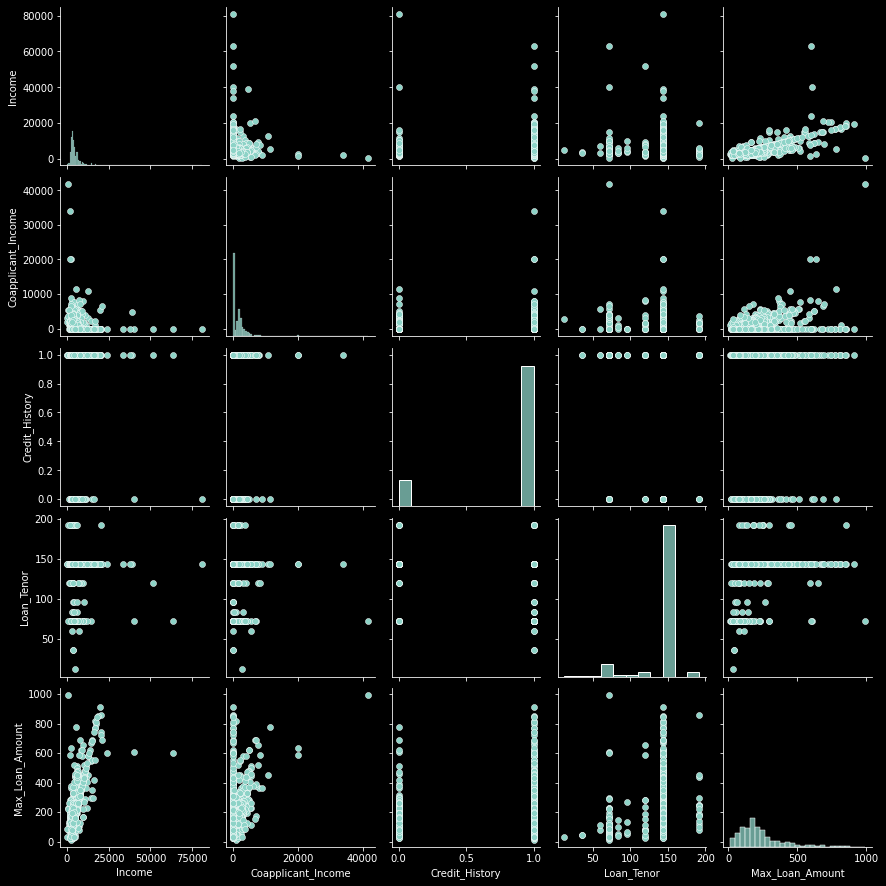

In [102]:
#visualize a pairplot between numercial columns
sns.pairplot(data[['Income','Coapplicant_Income','Credit_History','Loan_Tenor','Max_Loan_Amount']])
#plot.show()

In [103]:
#records containing missing values are removed
data.drop(columns=['Loan_ID'], inplace=True)
if data.isnull().values.any():
    data_cleaned_rows = data.dropna()
data_types = data_cleaned_rows.dtypes
print('----------------------')

----------------------


In [104]:
#check whether numerical features have the same scale
print('Numerical features scale: \n')
cnt=0
for column_name in data_cleaned_rows.columns:
    if data_types.iloc[cnt] == 'int64' or data_types.iloc[cnt] == 'float64':
        print(column_name,' : ',data_cleaned_rows[column_name].max()-data_cleaned_rows[column_name].min())
    cnt += 1

print('----------------------')

Numerical features scale: 

Income  :  63187
Coapplicant_Income  :  20000.0
Loan_Tenor  :  156.0
Credit_History  :  1.0
Max_Loan_Amount  :  899.16
----------------------


In [105]:
label_encoder = LabelEncoder()
cnt = 0

#categorical features and targets are encoded
for column_name in data_cleaned_rows.columns:
    if data_types.iloc[cnt] == 'object':
        data_cleaned_rows.loc[data_cleaned_rows.index, column_name] = label_encoder.fit_transform(
            data_cleaned_rows[column_name])
    cnt += 1

c:\Users\mkk\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [106]:
#the features and targets are separated
x=data_cleaned_rows.drop(columns=['Max_Loan_Amount','Loan_Status'])
y=data_cleaned_rows[['Max_Loan_Amount','Loan_Status']]

In [107]:
#the data is shuffled and split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
y_train_max_loan = y_train['Max_Loan_Amount']
y_test_max_loan = y_test['Max_Loan_Amount']
y_train_loan_status = y_train['Loan_Status']
y_test_loan_status = y_test['Loan_Status']

In [108]:
#numerical features are standardized
cnt=0
for column_name in x_train.columns:
    if data_types.iloc[cnt] == 'int64' or data_types.iloc[cnt] == 'float64':
        x_train[column_name]=(x_train[column_name]-x_train[column_name].mean())/x_train[column_name].std()
        x_test[column_name] = (x_test[column_name] - x_test[column_name].mean()) / x_test[column_name].std()
    cnt += 1

In [109]:
#Convert data to Numpy array
x_train = x_train.to_numpy().reshape((-1,9))
x_test = x_test.to_numpy().reshape((-1,9))
y_train_max_loan = y_train_max_loan.to_numpy()
y_test_max_loan = y_test_max_loan.to_numpy()

In [110]:
#Fit a linear regression model
model = linear_model.LinearRegression()
model.fit(x_train,y_train_max_loan)

print('Coefficients: \n', model.coef_, " ", model.intercept_)

Coefficients: 
 [ 10.38137211   4.13996897   6.55078486 -17.41010274 119.21011348
  66.7485454   50.18745967   2.85828951 -11.4683694 ]   223.21012076168074


In [111]:
#predict the loan amount
y_pred = model.predict(x_test)

r2 = r2_score(y_test_max_loan, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9155864189961535


In [112]:
'''
Logistic regression Algorithm: σ(z)
1. Define the Sigmoid Function
2. Initialize Parameters (θ and B)
3. Compute the Linear Combination: z = θ1x1+θ2x2+…+θnx n+b
4. Apply the Sigmoid Function: y = σ(z)
5. Define the Cost Function: J(θ)=− 1/m∑[y(i)log(y)+(1−y)log(1− y)]
6. Gradient Descent
    θj=θj−α∂j/∂θj
    b = b + −α∂j/∂b
'''
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [113]:
def initialize_parameters(dim):
    # Initialize weights and bias to zero
    theta = np.zeros((1, dim))
    b = 0
    return theta, b

In [114]:
def linear_combination(X, w, b):
    return np.dot(X, w.T) + b

In [115]:
def compute_cost(y, y_hat):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [116]:
def predict(X, w, b):
    z = linear_combination(X, w, b)
    return sigmoid(z)

In [117]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        # Compute linear combination
        z = linear_combination(X, w, b)
        # Apply sigmoid function and reshape
        y_hat = sigmoid(z).reshape(-1)
        # Compute cost
        cost = compute_cost(y, y_hat)
        # Compute gradients
        dw = 1/m * np.dot(X.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)
        # Update parameters
        w -= learning_rate * dw.T  # Transpose dw before updating weights
        b -= learning_rate * db
        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return w, b

In [118]:
# Display the shapes of the training data
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train_loan_status.shape)

X_train shape: (410, 9)
y_train shape: (410,)


In [119]:
# Initialize parameters before training
w, b = initialize_parameters(x_train.shape[1])

In [120]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

In [121]:
# Train the logistic regression model
w, b = gradient_descent(x_train, y_train_loan_status, w, b, learning_rate, num_iterations)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5830054431904503
Cost after iteration 200: 0.5433887689875921
Cost after iteration 300: 0.5218754403401371
Cost after iteration 400: 0.5085228819243084
Cost after iteration 500: 0.49974383078984264
Cost after iteration 600: 0.49374069284024535
Cost after iteration 700: 0.4894995704460625
Cost after iteration 800: 0.4864166843541704
Cost after iteration 900: 0.4841186963410987


In [122]:
# Print the trained parameters
print("Trained weights:", w)
print("Trained bias:", b)

Trained weights: [[ 0.1579157   0.25704459  0.14559309 -0.06424014 -0.00542735 -0.00394675
   0.02465578  1.01797017  0.17612275]]
Trained bias: 0.20878060958758243
